In [5]:
#Imports:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as sci
%matplotlib inline

In [6]:
file = '/Users/ilya/metis/week2/project2/clean_data.csv'
data = pd.read_csv(file)
del data['Unnamed: 0']
data = data.dropna(subset = ['total_gross', 'major_award_wins_or_noms'])

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 26 Apr 2015   Prob (F-statistic):                nan
Time:                        22:11:21   Log-Likelihood:                -59504.
No. Observations:                3069   AIC:                         1.190e+05
Df Residuals:                    3068   BIC:                         1.190e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.247e+07   1.15e+06     45.625      0.0

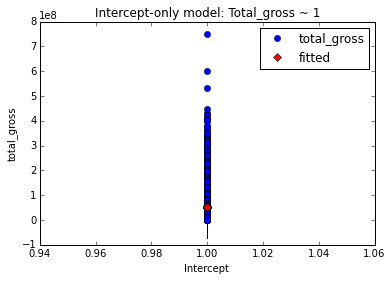

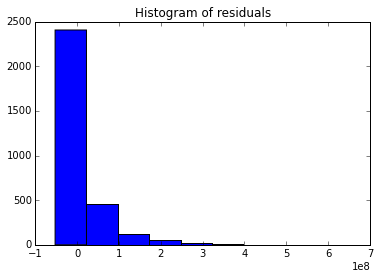

In [7]:
#Challenge 1:
#I'm predicting total_gross.
fit1 = smf.ols("total_gross ~ 1", data).fit()
print fit1.summary()

#The results of this model are just the mean of total_gross,
#and the model just predicts that the total_gross of a given 
#movie will be the mean total_gross for all movies.

#Plot predictions against actual outcome:
sm.graphics.plot_fit(fit1, 'Intercept')
plt.title('Intercept-only model: Total_gross ~ 1')
plt.show()

#Make histogram of residuals:
resids1 = fit1.resid
plt.hist(resids1)
plt.title('Histogram of residuals')
plt.show()

#The distribution of the residuals is right-skewed, and
#not normally distributed.

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     290.1
Date:                Sun, 26 Apr 2015   Prob (F-statistic):           3.16e-62
Time:                        22:11:39   Log-Likelihood:                -59365.
No. Observations:                3069   AIC:                         1.187e+05
Df Residuals:                    3067   BIC:                         1.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

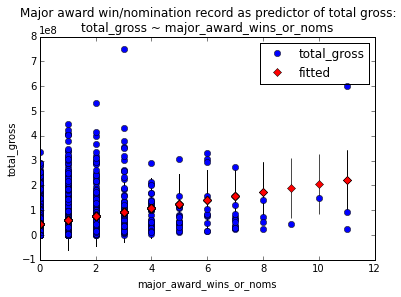

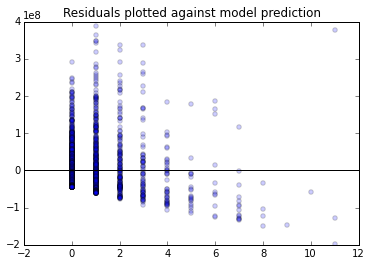

In [8]:
#Challenge 2:
#I'm predicting total_gross from the number of major award
#wins or nominations the movie has.
fit2 = smf.ols("total_gross ~ major_award_wins_or_noms", data).fit()
print fit2.summary()

#Plot model prediction against feature variable:
sm.graphics.plot_fit(fit2, 1)
plt.title('Major award win/nomination record as predictor of total gross:\ntotal_gross ~ major_award_wins_or_noms')
plt.show()

#Plot residuals against feature variable:
resids2 = fit2.resid
plt.scatter(data.major_award_wins_or_noms, 
    resids2, alpha = .2)
plt.hlines(y = 0, xmin = -2, xmax = 12)
plt.axis((-2,12,-2e8,4e8))
plt.title('Residuals plotted against model prediction')
plt.show()

#The model is predicting that as a movie wins more awards,
#it also gets a higher total_gross. But the residuals
#have a decreasing variance with increasing values of
#the feature variable.

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     55.69
Date:                Sun, 26 Apr 2015   Prob (F-statistic):           1.10e-13
Time:                        22:11:56   Log-Likelihood:                -59476.
No. Observations:                3069   AIC:                         1.190e+05
Df Residuals:                    3067   BIC:                         1.190e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept              4.883e+

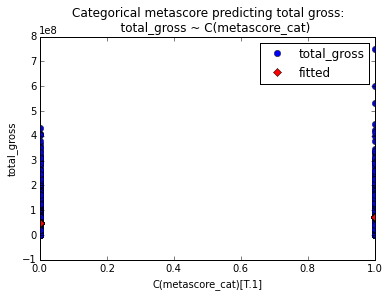

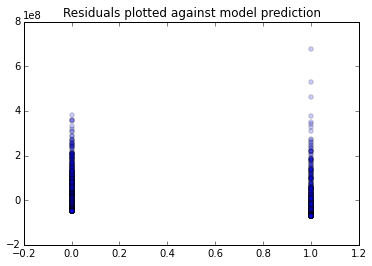

In [9]:
#Challenge 3:
#I am going to take the continuous variable metascore,
#which represents a movie's 0-100 score on metacritic, and
#make it categorical. The categories will be metascore > 70
#and metascore <= 70.
data['metascore_cat'] = [1 if x > 70 else 0 for x in data.metascore]

fit3 = smf.ols("total_gross ~ C(metascore_cat)", data).fit()
print fit3.summary()

#Plot model prediction against feature variable:
sm.graphics.plot_fit(fit3, 1)
plt.title('Categorical metascore predicting total gross:\n\
    total_gross ~ C(metascore_cat)')
plt.show()

#Plot residuals against feature variable:
resids3 = fit3.resid
plt.scatter(data.metascore_cat, resids3, alpha = .2)
# plt.hlines(y = 0, xmin = -2, xmax = 12)
plt.title('Residuals plotted against model prediction')
plt.show()

#Again, a linear model is probably not appropriate here,
#because the residual variance is not normally distributed
#around y = 0. Positive residuals are further away from 0 
#than negative ones, suggesting there are more negative 
#residual values. Checking len(resids3[resids3<0]) against 
#len(resids3[resids3>0]) confirms this.

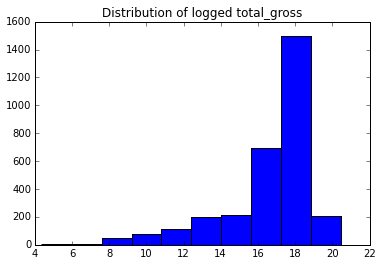

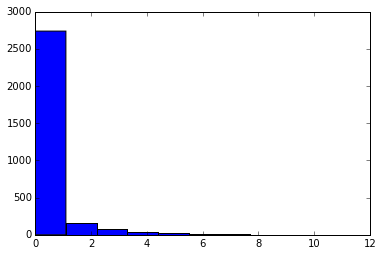

                            OLS Regression Results                            
Dep. Variable:     logged_total_gross   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 26 Apr 2015   Prob (F-statistic):           9.54e-36
Time:                        22:12:10   Log-Likelihood:                -6969.2
No. Observations:                3069   AIC:                         1.394e+04
Df Residuals:                    3067   BIC:                         1.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

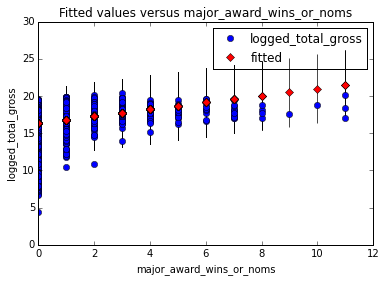

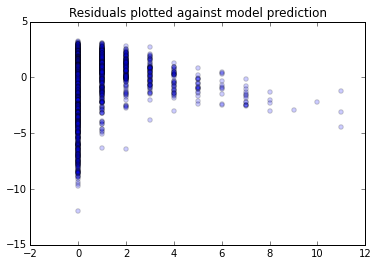

In [10]:

#Challenge 4:
#I'm going to transform the outcome variable to try to
#get a better model fit.
data['logged_total_gross'] = np.log(data.total_gross)
plt.hist(data.logged_total_gross)
plt.title('Distribution of logged total_gross')
plt.show()

plt.hist(data['major_award_wins_or_noms'])
plt.show()
#Now I'm going to run a model that predicts the logged
#total gross from using major award wins/nominations.
fit4 = smf.ols("logged_total_gross ~ major_award_wins_or_noms", data).fit()
print fit4.summary()

#Plot model prediction against feature variable:
sm.graphics.plot_fit(fit4, 1)
plt.show()

#Plot residuals against feature variable:
resids4 = fit4.resid
plt.scatter(data.major_award_wins_or_noms, resids4, alpha = .2)
# plt.hlines(y = 0, xmin = -2, xmax = 12)
plt.title('Residuals plotted against model prediction')
plt.show()

#This model still isn't good, because the residuals still
#show a decreasing variance.

                             OLS Regression Results                            
Dep. Variable:     box_cox_total_gross   R-squared:                       0.083
Model:                             OLS   Adj. R-squared:                  0.082
Method:                  Least Squares   F-statistic:                     207.7
Date:                 Sun, 26 Apr 2015   Prob (F-statistic):           3.86e-45
Time:                         22:12:20   Log-Likelihood:                -15961.
No. Observations:                 2302   AIC:                         3.193e+04
Df Residuals:                     2300   BIC:                         3.194e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept     

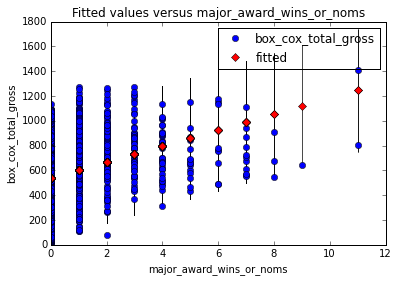

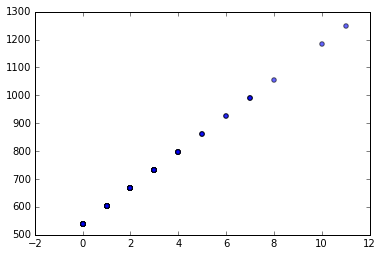

In [11]:
#Challenge 5:
import random
rows = random.sample(data.index, len(data)/4)
data['box_cox_total_gross'] = sci.boxcox(data.total_gross)[0]
training_data = data.drop(rows)
test_data = data.ix[rows]
fit5 = smf.ols("box_cox_total_gross ~ major_award_wins_or_noms", 
    data.drop(rows)).fit()
print fit5.summary()

#Plot model prediction against feature variable:
sm.graphics.plot_fit(fit5, 1)
plt.show()

#Plot estimates against raw test data:
news = data.ix[rows]['major_award_wins_or_noms']
news = sm.add_constant(news)
y_hat = fit5.predict(news)
plt.scatter(test_data.major_award_wins_or_noms, y_hat, alpha=0.6)
plt.show()